In [2]:
import pickle
import pandas as pd
from sklearn import tree

data = pd.read_csv("data-turbine/clear-data-nox.csv")
model = pickle.load(open("data-turbine/tree-nox-gs.model.sav", "rb"))
features = (
    data
    .drop(["NOX"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- AT <= 16.96
|   |--- TIT <= 1042.85
|   |   |--- TAT <= 541.98
|   |   |   |--- TAT <= 537.80
|   |   |   |   |--- AFDP <= 3.44
|   |   |   |   |   |--- AFDP <= 2.37
|   |   |   |   |   |   |--- AH <= 78.35
|   |   |   |   |   |   |   |--- value: [103.29]
|   |   |   |   |   |   |--- AH >  78.35
|   |   |   |   |   |   |   |--- AT <= 9.05
|   |   |   |   |   |   |   |   |--- value: [92.40]
|   |   |   |   |   |   |   |--- AT >  9.05
|   |   |   |   |   |   |   |   |--- value: [82.97]
|   |   |   |   |   |--- AFDP >  2.37
|   |   |   |   |   |   |--- TAT <= 511.82
|   |   |   |   |   |   |   |--- value: [66.00]
|   |   |   |   |   |   |--- TAT >  511.82
|   |   |   |   |   |   |   |--- AFDP <= 3.08
|   |   |   |   |   |   |   |   |--- AFDP <= 2.70
|   |   |   |   |   |   |   |   |   |--- AT <= 13.58
|   |   |   |   |   |   |   |   |   |   |--- AH <= 93.59
|   |   |   |   |   |   |   |   |   |   |   |--- value: [111.42]
|   |   |   |   |   |   |   |   |   |   |--- AH >  93.59
|   | 

In [3]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

971

[if (AT > 16.958) and (TIT > 1083.05) and (TAT > 548.92) and (AFDP > 3.481) and (AH > 73.677) and (AT > 23.127) and (AH <= 84.985) and (AT <= 26.791) and (AFDP <= 4.046) and (AFDP > 4.045) -> 27.765,
 if (AT > 16.958) and (TIT <= 1083.05) and (AT > 20.867) and (AT > 22.88) and (AH > 75.36) and (AT <= 24.056) and (AH > 89.685) and (TIT > 1045.4) and (TIT <= 1080.45) and (AH > 95.704) and (AT <= 22.902) -> 40.497,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT <= 537.8) and (AFDP <= 3.444) and (AFDP <= 2.374) and (AH > 78.348) and (AT > 9.054) -> 82.971,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT <= 537.8) and (AFDP <= 3.444) and (AFDP > 2.374) and (TAT <= 511.82) -> 66.005,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT <= 537.8) and (AFDP <= 3.444) and (AFDP > 2.374) and (TAT > 511.82) and (AFDP <= 3.078) and (AFDP <= 2.7) and (AT <= 13.577) and (AH <= 93.586) -> 111.418,
 if (AT <= 16.958) and (TIT <= 1042.85) an

In [4]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

971

[if (AT > 16.958) and (AT <= 26.791) and (TIT > 1083.05) and (TAT > 548.92) and (AFDP > 3.481) and (AFDP <= 4.046) and (AH > 73.677) and (AH <= 84.985) -> 27.765,
 if (AT > 16.958) and (AT <= 24.056) and (TIT <= 1083.05) and (TIT > 1045.4) and (AH > 75.36) -> 40.497,
 if (AT <= 16.958) and (AT > 9.054) and (TIT <= 1042.85) and (TAT <= 541.975) and (AFDP <= 3.444) and (AH > 78.348) -> 82.971,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (AFDP <= 3.444) and (AFDP > 2.374) -> 66.005,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) and (AH <= 93.586) -> 111.418,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) and (AH > 93.586) -> 104.229,
 if (AT <= 16.958) and (AT > 13.577) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) -> 96.548,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TA

In [5]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
for_cluster = rules.copy()
rules

792

[if (AT <= 16.958) and (AT > 9.054) and (TIT <= 1042.85) and (TAT <= 541.975) and (AFDP <= 3.444) and (AH > 78.348) -> 82.971,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (AFDP <= 3.444) and (AFDP > 2.374) -> 66.005,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) and (AH <= 93.586) -> 111.418,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) and (AH > 93.586) -> 104.229,
 if (AT <= 16.958) and (AT > 13.577) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) -> 96.548,
 if (AT <= 16.958) and (AT > 13.87) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) -> 107.645,
 if (AT <= 16.958) and (TIT <= 1042.85) and (TAT <= 541.975) and (TAT > 511.82) and (AFDP <= 3.444) and (AFDP > 2.374) -> 108.611,
 if (AT <= 16.958) and (AT > 9.387) 

In [6]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["NOX"]
X = data.drop(["NOX"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AT      AP      AH    AFDP     TIT     TAT
4480   26.6350  1009.7  83.256  4.4137  1100.0  540.65
24883  20.2280  1016.2  73.583  4.6238  1099.8  538.53
21557  15.6330  1018.5  81.089  4.0899  1100.0  534.04
1705   16.6540  1020.2  64.757  4.5755  1086.6  549.76
21388  21.0020  1004.3  75.645  4.1101  1100.0  534.21
...        ...     ...     ...     ...     ...     ...
25725  17.5190  1015.9  85.663  3.6809  1072.2  549.82
5014   21.9780  1014.4  75.280  3.1246  1058.0  549.86
22584   4.7103  1003.0  92.874  3.2741  1067.2  550.15
501     6.7758  1008.3  93.029  5.1192  1099.9  524.78
20828  17.6730  1020.7  88.840  3.0370  1079.9  550.02

[29386 rows x 6 columns]

4480     52.970
24883    58.801
21557    78.066
1705     73.955
21388    79.989
          ...  
25725    53.424
5014     58.462
22584    65.275
501      65.469
20828    77.008
Name: NOX, Length: 29386, dtype: float64

AT      AP      AH    AFDP     TIT     TAT
18246  23.4530  1006.2  84.837  3.7535  1088.7  550.39
20343  28.7090  1011.2  59.574  6.0321  1100.0  542.01
2924   21.8330  1017.0  81.262  3.9663  1092.9  544.91
117     7.8167  1022.2  88.135  4.6605  1100.0  526.21
5713   19.9120  1013.1  86.846  3.6710  1080.2  550.25
...        ...     ...     ...     ...     ...     ...
21917   9.5791  1017.5  75.935  2.9617  1081.1  549.66
13099  22.6150  1012.1  78.314  4.2739  1089.8  550.37
26704  28.4020  1004.4  79.478  4.0643  1073.0  550.19
4182   31.7400  1012.2  41.623  4.5323  1100.2  539.10
2982   23.7130  1013.5  69.233  3.7112  1091.6  549.98

[7347 rows x 6 columns]

18246    58.948
20343    62.909
2924     61.083
117      66.369
5713     56.675
          ...  
21917    71.316
13099    63.308
26704    49.210
4182     59.452
2982     66.807
Name: NOX, Length: 7347, dtype: float64

In [7]:
from src.rules import simplify_rules

rules = simplify_rules(X_train, rules)
rules

[if (AT = 13.006) and (TIT = 1001.3) and (TAT = 511.04) and (AFDP = 2.099) and (AH = 100.2) -> 82.971,
 if (AT = -6.235) and (TIT = 1001.3) and (TAT = 511.04) and (AFDP = 2.909) -> 66.005,
 if (AT = -6.235) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) and (AH = 24.085) -> 111.418,
 if (AT = -6.235) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) and (AH = 100.2) -> 104.229,
 if (AT = 15.268) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) -> 96.548,
 if (AT = 15.414) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) -> 107.645,
 if (AT = -6.235) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) -> 108.611,
 if (AT = 13.173) and (TIT = 1001.3) and (TAT = 526.897) and (AFDP = 2.909) -> 115.066,
 if (AT = -6.235) and (TIT = 1034.95) and (TAT = 526.897) and (AFDP = 2.909) -> 113.84,
 if (AT = -6.235) and (TIT = 1039.75) and (TAT = 526.897) and (AFDP = 2.909) -> 106.678,
 if (AT = 13.159) and (TIT = 1039.75) and (TAT = 526.897) and (AFDP = 2.

In [8]:
data.describe().transpose()

count         mean        std        min        25%        50%  \
AT    36733.0    17.712726   7.447451    -6.2348    11.7810    17.8010   
AP    36733.0  1013.070165   6.463346   985.8500  1008.8000  1012.6000   
AH    36733.0    77.867015  14.461355    24.0850    68.1880    80.4700   
AFDP  36733.0     3.925518   0.773936     2.0874     3.3556     3.9377   
TIT   36733.0  1081.428084  17.536373  1000.8000  1071.8000  1085.9000   
TAT   36733.0   546.158517   6.842360   511.0400   544.7200   549.8800   
NOX   36733.0    65.293067  11.678357    25.9050    57.1620    63.8490   

            75%        max  
AT      23.6650    37.1030  
AP    1017.0000  1036.6000  
AH      89.3760   100.2000  
AFDP     4.3769     7.6106  
TIT   1097.0000  1100.9000  
TAT    550.0400   550.6100  
NOX     71.5480   119.9100

In [25]:
import numpy as np
from skfuzzy import control as ctrl

AT = ctrl.Antecedent(np.arange(-6.2348, 37.103, 0.0001), "AT")
AP = ctrl.Antecedent(np.arange(985.85, 1036.6, 0.01), "AP")
AH = ctrl.Antecedent(np.arange(24.085, 100.2, 0.001), "AH")
AFDP = ctrl.Antecedent(np.arange(2.0874, 7.6106, 0.0001), "AFDP")
TIT = ctrl.Antecedent(np.arange(1000.8, 1100.9, 0.1), "TIT")
TAT = ctrl.Antecedent(np.arange(511.04, 550.61, 0.01), "TAT")
NOX = ctrl.Consequent(np.arange(25.905, 119.91, 0.001), "NOX")

AT.automf(3, variable_type="quant")
AP.automf(5, variable_type="quant")
AH.automf(3, variable_type="quant")
AFDP.automf(5, variable_type="quant")
TIT.automf(5, variable_type="quant")
TAT.automf(5, variable_type="quant")
NOX.automf(3, variable_type="quant")

In [26]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {
    "AT": AT,
    "AP": AP,
    "AH": AH,
    "AFDP": AFDP,
    "TIT": TIT,
    "TAT": TAT,
    "consequent": NOX,
}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

581

[IF (((AT[low] AND TIT[lower]) AND TAT[average]) AND AFDP[low]) AND AH[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((AT[low] AND TIT[lower]) AND TAT[average]) AND AFDP[low]) AND AH[high] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TIT[lower]) AND TAT[average]) AND AFDP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[average] AND TIT[lower]) AND TAT[average]) AND AFDP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TIT[low]) AND TAT[average]) AND AFDP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TIT[average]) AND TAT[average]) AND AFDP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[average] AND TIT[average]) AND TAT[average]) AND AFDP[low] THEN NOX[high]
 	AND ag

 Antecedents 
Antecedent: AT                      = 4.5878
  - low                             : 0.5005457142384011
  - average                         : 0.49945428576159895
  - high                            : 0.0
Antecedent: TIT                     = 1086.2
  - lower                           : 0.0
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 0.5874125874133622
  - higher                          : 0.4125874125866378
Antecedent: TAT                     = 549.83
  - lower                           : 0.0
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 0.07785642062332086
  - higher                          : 0.9221435793766791
Antecedent: AFDP                    = 3.5758
  - lower                           : 0.0
  - low                             : 0.9220546432279997
  - average                         : 0.07794535677200005
  - high   

np.float64(67.50150036894121)

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


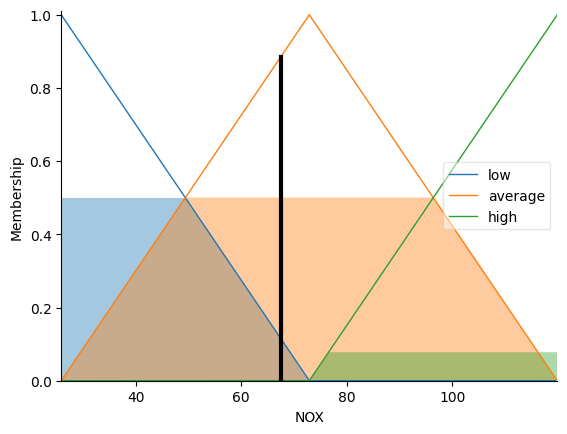

In [27]:
sim.input["AT"] = 4.5878
sim.input["AP"] = 1018.7
sim.input["AH"] = 83.675
sim.input["AFDP"] = 3.5758
sim.input["TIT"] = 1086.2
sim.input["TAT"] = 549.83
sim.compute()
sim.print_state()
display(sim.output["NOX"])
NOX.view(sim=sim)

In [31]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["AT"] = row["AT"]
    sim.input["AP"] = row["AP"]
    sim.input["AH"] = row["AH"]
    sim.input["AFDP"] = row["AFDP"]
    sim.input["TIT"] = row["TIT"]
    sim.input["TAT"] = row["TAT"]
    sim.compute()
    return sim.output["NOX"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

items_count = 100

result_train = X_train.copy()
result_train["Real"] = y_train
result_train = result_train[: items_count]

result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train

AT      AP      AH    AFDP     TIT     TAT    Real   Inferred  \
4480   26.6350  1009.7  83.256  4.4137  1100.0  540.65  52.970  72.907000   
24883  20.2280  1016.2  73.583  4.6238  1099.8  538.53  58.801  72.907000   
21557  15.6330  1018.5  81.089  4.0899  1100.0  534.04  78.066  72.907000   
1705   16.6540  1020.2  64.757  4.5755  1086.6  549.76  73.955  72.975539   
21388  21.0020  1004.3  75.645  4.1101  1100.0  534.21  79.989  72.907000   
...        ...     ...     ...     ...     ...     ...     ...        ...   
22513  13.2500  1009.6  91.734  3.2845  1067.8  549.97  59.381  66.049299   
27582  28.2880  1013.5  67.437  5.1923  1099.5  547.23  55.701  72.907000   
21208  14.4130  1015.1  94.577  3.2086  1087.0  549.73  62.053  66.996029   
89      7.9395  1020.3  87.203  3.5841  1084.6  550.03  82.344  66.182386   
22754   9.4785  1010.5  95.484  3.8104  1090.4  549.99  85.412  69.108803   

         RMSE  
4480   19.937  
24883  14.106  
21557   5.159  
1705    0.979  
21388   7.082  
...       ...  
22513   6.668  
27582  17.206  
21208   4.943  
89     16.162  
22754  16.303  

[100 rows x 9 columns]

In [32]:
result_test = X_test.copy()
result_test["Real"] = y_test
result_test = result_test[:items_count]

result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

EmptyMembershipError: Cannot defuzzify the fuzzy variable 'NOX'.  The membership area is empty. Probably the rule system is too sparse. Check to make sure the given input values will activate at least one connected term in each antecedent via the current set of rules.

In [ ]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_train"] = math.sqrt(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_train"] = metrics.r2_score(result_train["Real"], result_train["Inferred"])
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 11.126163951488943,
 'RMSE_test': 9.604962485088372,
 'RMAE_train': 3.0227566696711943,
 'RMAE_test': 3.0263889638388863,
 'R2_train': -0.1389554749003863,
 'R2_test': -0.974837404147793}